In [7]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from autogluon.tabular import TabularPredictor
from sklearn.model_selection import train_test_split

pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', None)

In [9]:
%autoreload
from pathlib import Path
import sys
root = Path().resolve().absolute().parent.parent
print(root)
sys.path.append(str(root))

from src.pipeline import Pipeline, BuilingIdsEnum
pipe = Pipeline()



/Users/matsalexander/Desktop/SolarEnergyImpact


In [10]:
building_b = pipe.get_data(BuilingIdsEnum.B)
building_c = pipe.get_data(BuilingIdsEnum.C)
building_a = pipe.get_data(BuilingIdsEnum.A)

# from november 1. to 1. mars only use data from dataset b 
# else use data from dataset c and a

# remove from 2024-01-15 from dataset b
mask_b = (building_b['timestamp'] >= '2024-01-15') & (building_b['timestamp'] <= '2024-01-15')
building_b = building_b[~mask_b]

start_winter = '2023-11-01'
end_winter = '2024-03-01'
# mask_b = (building_b['timestamp'] >= start_winter) & (building_b['timestamp'] <= end_winter)
# building_b = building_b[mask_b]

mask_c = (building_c['timestamp'] < start_winter) | (building_c['timestamp'] > end_winter)
building_c = building_c[mask_c]


# building a, not in winter
# remove anomoloes

mask_a = (building_a['timestamp'] < start_winter) | (building_a['timestamp'] > end_winter)
building_a = building_a[mask_a]
mask_a2 = (building_a['timestamp'] >= '2024-07-03') & (building_a['timestamp'] <= '2024-07-07')
building_a = building_a[~mask_a2]




combined_df = pd.concat([building_a,building_b, building_c], ignore_index=True)
# reset index
combined_df = combined_df.reset_index(drop=True)
# Perform the train-test split with stratification based on 'building_id'
train_data, test_data = train_test_split(
    combined_df,
    test_size=0.20,
    random_state=42,
    stratify=combined_df['building']
)

# select features
target = "value_import"
features = ["timestamp", "temperature", "area", "wind_speed"] #, "cloud_fraction", "precipitation", "area", "wind_speed"

train_data = train_data[features + [target]]
test_data = test_data[features + [target]]



In [11]:
# Train the model using AutoGluon
predictor = TabularPredictor(label=target, eval_metric='mean_absolute_error').fit(
    train_data, 
    presets='best_quality',
    excluded_model_types=['KNN']
    )

No path specified. Models will be saved in: "AutogluonModels/ag-20241114_161050"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.1.1
Python Version:     3.10.13
Operating System:   Darwin
Platform Machine:   arm64
Platform Version:   Darwin Kernel Version 23.6.0: Mon Jul 29 21:14:30 PDT 2024; root:xnu-10063.141.2~1/RELEASE_ARM64_T6000
CPU Count:          10
Memory Avail:       14.03 GB / 32.00 GB (43.9%)
Disk Space Avail:   601.08 GB / 926.35 GB (64.9%)
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
	This is used to identify the optimal 

[1000]	valid_set's l1: 5.97832
[2000]	valid_set's l1: 5.69902
[3000]	valid_set's l1: 5.54272
[4000]	valid_set's l1: 5.42794
[5000]	valid_set's l1: 5.34612
[6000]	valid_set's l1: 5.28666
[7000]	valid_set's l1: 5.24776
[8000]	valid_set's l1: 5.21666
[9000]	valid_set's l1: 5.18884
[10000]	valid_set's l1: 5.16503
[1000]	valid_set's l1: 6.06332
[2000]	valid_set's l1: 5.81513
[3000]	valid_set's l1: 5.67925
[4000]	valid_set's l1: 5.58937
[5000]	valid_set's l1: 5.5217
[6000]	valid_set's l1: 5.45856
[7000]	valid_set's l1: 5.41697
[8000]	valid_set's l1: 5.38161
[9000]	valid_set's l1: 5.3454
[10000]	valid_set's l1: 5.32221
[1000]	valid_set's l1: 5.95875
[2000]	valid_set's l1: 5.68072
[3000]	valid_set's l1: 5.52109
[4000]	valid_set's l1: 5.40332
[5000]	valid_set's l1: 5.3253
[6000]	valid_set's l1: 5.27174
[7000]	valid_set's l1: 5.22741
[8000]	valid_set's l1: 5.19745
[9000]	valid_set's l1: 5.17222
[10000]	valid_set's l1: 5.15394
[1000]	valid_set's l1: 5.89207
[2000]	valid_set's l1: 5.64377
[3000]	v

	-5.2277	 = Validation score   (-mean_absolute_error)
	358.42s	 = Training   runtime
	2.49s	 = Validation runtime
Fitting model: LightGBM_BAG_L1 ... Training model for up to 237.09s of the 537.22s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy


[1000]	valid_set's l1: 4.61346
[2000]	valid_set's l1: 4.51088
[3000]	valid_set's l1: 4.47661
[4000]	valid_set's l1: 4.47175
[1000]	valid_set's l1: 4.60972
[2000]	valid_set's l1: 4.50673
[3000]	valid_set's l1: 4.47462
[4000]	valid_set's l1: 4.48562
[1000]	valid_set's l1: 4.45154
[2000]	valid_set's l1: 4.32688
[3000]	valid_set's l1: 4.28977
[4000]	valid_set's l1: 4.29804
[1000]	valid_set's l1: 4.58469
[2000]	valid_set's l1: 4.4378
[3000]	valid_set's l1: 4.39536
[4000]	valid_set's l1: 4.38425
[5000]	valid_set's l1: 4.37496
[6000]	valid_set's l1: 4.37984
[7000]	valid_set's l1: 4.39309
[1000]	valid_set's l1: 4.62572
[2000]	valid_set's l1: 4.48612
[3000]	valid_set's l1: 4.442


	Ran out of time, early stopping on iteration 3052. Best iteration is:
	[3052]	valid_set's l1: 4.43852


[1000]	valid_set's l1: 4.36522
[2000]	valid_set's l1: 4.26945
[3000]	valid_set's l1: 4.26727
[1000]	valid_set's l1: 4.48955
[2000]	valid_set's l1: 4.38656
[3000]	valid_set's l1: 4.36203
[4000]	valid_set's l1: 4.36744
[1000]	valid_set's l1: 4.51516
[2000]	valid_set's l1: 4.42409
[3000]	valid_set's l1: 4.38721


	-4.3787	 = Validation score   (-mean_absolute_error)
	157.57s	 = Training   runtime
	0.59s	 = Validation runtime
Fitting model: RandomForestMSE_BAG_L1 ... Training model for up to 78.29s of the 378.41s of remaining time.
	-3.6273	 = Validation score   (-mean_absolute_error)
	2.27s	 = Training   runtime
	0.61s	 = Validation runtime
Fitting model: CatBoost_BAG_L1 ... Training model for up to 75.04s of the 375.17s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 2381.
	Ran out of time, early stopping on iteration 2447.
	Ran out of time, early stopping on iteration 2499.
	Ran out of time, early stopping on iteration 2559.
	Ran out of time, early stopping on iteration 2636.
	Ran out of time, early stopping on iteration 2746.
	Ran out of time, early stopping on iteration 2921.
	Ran out of time, early stopping on iteration 3225.
	-4.6419	 = Validation score   (-mean_absolute_error)
	71.96s

[1000]	valid_set's l1: 5.80461
[2000]	valid_set's l1: 5.53127
[3000]	valid_set's l1: 5.38869
[4000]	valid_set's l1: 5.29317
[5000]	valid_set's l1: 5.22817
[6000]	valid_set's l1: 5.18645
[7000]	valid_set's l1: 5.13791
[8000]	valid_set's l1: 5.10493
[9000]	valid_set's l1: 5.08039
[10000]	valid_set's l1: 5.0617
[1000]	valid_set's l1: 5.79621
[2000]	valid_set's l1: 5.50859
[3000]	valid_set's l1: 5.35227
[4000]	valid_set's l1: 5.24816
[5000]	valid_set's l1: 5.1784
[6000]	valid_set's l1: 5.12595
[7000]	valid_set's l1: 5.08874
[8000]	valid_set's l1: 5.06536
[9000]	valid_set's l1: 5.04195
[10000]	valid_set's l1: 5.02847
[1000]	valid_set's l1: 6.25364
[2000]	valid_set's l1: 5.94651
[3000]	valid_set's l1: 5.76817
[4000]	valid_set's l1: 5.65749
[5000]	valid_set's l1: 5.57234
[6000]	valid_set's l1: 5.50544
[7000]	valid_set's l1: 5.44931
[8000]	valid_set's l1: 5.40845
[9000]	valid_set's l1: 5.37464
[10000]	valid_set's l1: 5.34378
[1000]	valid_set's l1: 5.82005
[2000]	valid_set's l1: 5.62719
[3000]	

	-5.178	 = Validation score   (-mean_absolute_error)
	530.37s	 = Training   runtime
	2.94s	 = Validation runtime
Fitting model: LightGBM_BAG_L1 ... Training model for up to 1263.15s of the 2162.98s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy


[1000]	valid_set's l1: 4.4045
[2000]	valid_set's l1: 4.2406
[3000]	valid_set's l1: 4.19037
[4000]	valid_set's l1: 4.16391
[5000]	valid_set's l1: 4.17222
[1000]	valid_set's l1: 4.3332
[2000]	valid_set's l1: 4.21467
[3000]	valid_set's l1: 4.19496
[4000]	valid_set's l1: 4.19724
[1000]	valid_set's l1: 4.69901
[2000]	valid_set's l1: 4.5564
[3000]	valid_set's l1: 4.50889
[4000]	valid_set's l1: 4.48388
[5000]	valid_set's l1: 4.47518
[6000]	valid_set's l1: 4.48234
[1000]	valid_set's l1: 4.41965
[2000]	valid_set's l1: 4.32901
[3000]	valid_set's l1: 4.30781
[4000]	valid_set's l1: 4.30271
[1000]	valid_set's l1: 4.49222
[2000]	valid_set's l1: 4.36326
[3000]	valid_set's l1: 4.34611
[1000]	valid_set's l1: 4.53766
[2000]	valid_set's l1: 4.36944
[3000]	valid_set's l1: 4.29432
[4000]	valid_set's l1: 4.27488
[5000]	valid_set's l1: 4.27471
[1000]	valid_set's l1: 4.52391
[2000]	valid_set's l1: 4.39766
[3000]	valid_set's l1: 4.35389
[4000]	valid_set's l1: 4.34331
[1000]	valid_set's l1: 4.52996
[2000]	valid

	-4.2994	 = Validation score   (-mean_absolute_error)
	269.99s	 = Training   runtime
	0.77s	 = Validation runtime
Fitting model: RandomForestMSE_BAG_L1 ... Training model for up to 991.65s of the 1891.48s of remaining time.
	-3.5203	 = Validation score   (-mean_absolute_error)
	2.52s	 = Training   runtime
	0.68s	 = Validation runtime
Fitting model: CatBoost_BAG_L1 ... Training model for up to 988.08s of the 1887.91s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	-4.3693	 = Validation score   (-mean_absolute_error)
	701.76s	 = Training   runtime
	0.05s	 = Validation runtime
Fitting model: ExtraTreesMSE_BAG_L1 ... Training model for up to 286.18s of the 1186.01s of remaining time.
	-3.7134	 = Validation score   (-mean_absolute_error)
	1.04s	 = Training   runtime
	0.66s	 = Validation runtime
Fitting model: NeuralNetFastAI_BAG_L1 ... Training model for up to 284.1s of the 1183.93s of remaining time.
	Fitting 8 child models (S1F1 

In [12]:
# winter3 first predictor = TabularPredictor.load("AutogluonModels/ag-20241113_235901")
# Evaluate on test data
performance = predictor.evaluate(test_data)
# best model: ag-20241022_161331

print("Evaluation Performance:")
performance
# reset index 
test_data = test_data.reset_index(drop=True)
# To see feature importance
global_importance = predictor.feature_importance(test_data)
print("\nFeature Importance:")
print(global_importance)  # Shows which features had the most impact on model predictions


Computing feature importance via permutation shuffling for 4 features using 5000 rows with 5 shuffle sets...


Evaluation Performance:


	13168.91s	= Expected runtime (2633.78s per shuffle set)
	780.05s	= Actual runtime (Completed 5 of 5 shuffle sets)



Feature Importance:
             importance    stddev       p_value  n  p99_high   p99_low
area           5.823134  0.093837  8.089060e-09  5  6.016345  5.629922
timestamp      5.231540  0.092413  1.167929e-08  5  5.421820  5.041260
temperature    5.002918  0.073845  5.694353e-09  5  5.154965  4.850870
wind_speed     0.730750  0.036650  7.567407e-07  5  0.806213  0.655287


In [13]:
performance

{'mean_absolute_error': -3.3715861336071593,
 'root_mean_squared_error': -5.073524397369017,
 'mean_squared_error': -25.740649810698645,
 'r2': 0.8274494213899131,
 'pearsonr': 0.9097357403688727,
 'median_absolute_error': -2.042791595458983}

In [14]:
# model location => AutogluonModels/ag-20241016_095906
main_building = pipe.get_data(BuilingIdsEnum.MAIN)

data_predict = main_building[features]
data_predict


,timestamp,temperature,area,wind_speed
0,2023-07-01 00:00:00,13.6,1199,1.6
1,2023-07-01 01:00:00,13.2,1199,2.0
2,2023-07-01 02:00:00,12.3,1199,1.6
3,2023-07-01 03:00:00,11.9,1199,0.6
4,2023-07-01 04:00:00,11.9,1199,0.2
...,...,...,...,...
10338,2024-09-03 18:00:00,17.8,1199,2.5
10339,2024-09-03 19:00:00,17.8,1199,1.8
10340,2024-09-03 20:00:00,17.7,1199,1.1
10341,2024-09-03 21:00:00,18.0,1199,3.4


In [15]:
prediciton1 = predictor.predict(data_predict)

In [16]:
# save predicitons as a csv in data folder from root.
import datetime
from pathlib import Path


prediciton1_df = pd.DataFrame(prediciton1)
date_time = datetime.datetime.now().strftime("%Y%m%d_%H")
my_path = Path().resolve().parent.parent / 'data'/ "pred" / 'prediction_winter3.csv'
if my_path.exists():
    my_path = Path().resolve().parent.parent / 'data'/ "pred" / f'prediction_winter3_{date_time}.csv'
# create folder
my_path.parent.mkdir(parents=True, exist_ok=True)
prediciton1_df.to_csv(my_path, index=False)

In [17]:
import numpy as np
# Reset index if needed
test_data = test_data.reset_index(drop=True)

# Compute SMAPE witch means Symmetric Mean Absolute Percentage Error
def smape(y_true, y_pred):
    denominator = (np.abs(y_true) + np.abs(y_pred)) / 2
    diff = np.abs(y_true - y_pred)
    smape_values = np.where(denominator != 0, diff / denominator, 0)
    return np.mean(smape_values) * 100

# Replace 'target_column' with your actual target column name
y_true = test_data[target]
y_pred = predictor.predict(test_data)
smape_value = smape(y_true, y_pred)
print(f"\nSMAPE: {smape_value:.2f}%")

# Analyze percent-wise errors
percentage_errors = np.abs((y_true - y_pred) / y_true) * 100
percentage_errors = np.where(y_true != 0, percentage_errors, 0)

mean_percentage_error = np.mean(percentage_errors)
median_percentage_error = np.median(percentage_errors)
max_percentage_error = np.max(percentage_errors)


SMAPE: 10.81%


Mean Percentage Error: 12.31%
Median Percentage Error: 6.05%
Max Percentage Error: 5061.99%


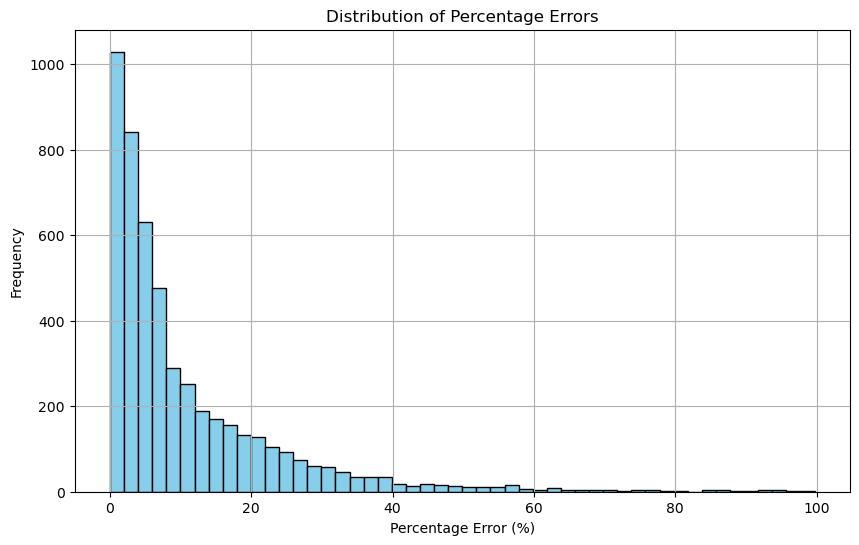

In [18]:

print(f"Mean Percentage Error: {mean_percentage_error:.2f}%")
print(f"Median Percentage Error: {median_percentage_error:.2f}%")
print(f"Max Percentage Error: {max_percentage_error:.2f}%")
percentage_errors_trimmed = percentage_errors[percentage_errors < 100]
# Plot percentage error distribution
plt.figure(figsize=(10, 6))
plt.hist(percentage_errors_trimmed, bins=50, color='skyblue', edgecolor='black')
plt.xlabel('Percentage Error (%)')
plt.ylabel('Frequency')
plt.title('Distribution of Percentage Errors')
plt.grid(True)
plt.show()

# Feature Importance
# global_importance = predictor.feature_importance(test_data)


Feature Importance:
             importance    stddev       p_value  p99_high   p99_low
area           5.823134  0.093837  2.158387e+15  6.016345  5.629922
timestamp      5.231540  0.092413  3.116361e+15  5.421820  5.041260
temperature    5.002918  0.073845  1.519412e+15  5.154965  4.850870
wind_speed     0.730750  0.036650  2.019196e+17  0.806213  0.655287


<Figure size 1200x800 with 0 Axes>

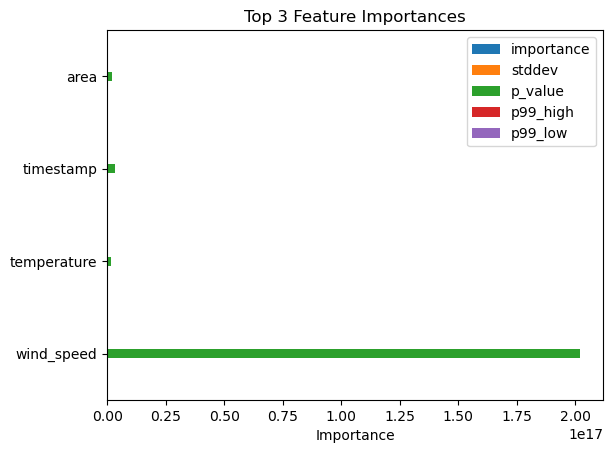

In [34]:
print("\nFeature Importance:")
print(global_importance)

# Plot top 20 feature importances
plt.figure(figsize=(12, 8))
# remove the n from the golbal_importance plot
global_importance.columns
# Index(['importance'	'stddev'	'p_value'	'n'	'p99_high'	'p99_low']	dtype='object')

if 'n' in global_importance.columns:
    global_importance = global_importance.drop(columns=['n'])
    
global_importance.head(20).plot(kind='barh')

# let the p_value be in 10^-3 scale
global_importance['p_value'] = global_importance['p_value'] * (10^(-13))

plt.xlabel('Importance')
plt.title('Top 3 Feature Importances')
plt.gca().invert_yaxis()
plt.show()

# Optional: SHAP Values for advanced insights
# explainer = predictor.explain(test_data, model='best')
# explainer.plot_feature_importance()
